In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

## Import Dataset

In [2]:
data = pd.read_csv('../input/amazon-top-50-bestselling-books-2009-2019/bestsellers with categories.csv')
data.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [3]:
description=np.load('../input/book-description/Book_description.npy')
data['Description']=description
data.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre,Description
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,4.5/5 · Barnes & Noble\n4.8/5 · Walmart\n4.7/5...
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,11/22/63 is a novel by Stephen King about a ti...
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,3.9/5 · Goodreads\n4.9/5 · Barnes & Noble\n1/4...
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,"Written more than 70 years ago, 1984 was Georg..."
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,"Presenting the next must-have, fun-filled gift..."


## DATA CLEANING

In [4]:
data.columns

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre',
       'Description'],
      dtype='object')

## Strings

## Name

In [5]:
print("Name:", '\n', data['Name'].value_counts())

Name: 
 Publication Manual of the American Psychological Association, 6th Edition       10
StrengthsFinder 2.0                                                              9
Oh, the Places You'll Go!                                                        8
The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change     7
The Very Hungry Caterpillar                                                      7
                                                                                ..
The Book of Basketball: The NBA According to The Sports Guy                      1
Obama: An Intimate Portrait                                                      1
Creative Haven Creative Cats Coloring Book (Adult Coloring)                      1
Old School (Diary of a Wimpy Kid #10)                                            1
Decision Points                                                                  1
Name: Name, Length: 351, dtype: int64


In [6]:
display(data[data['Name']=='Publication Manual of the American Psychological Association, 6th Edition'].head())
display(data[data['Name']=='StrengthsFinder 2.0'].head())
display(data[data['Name']=="Oh, the Places You'll Go!"].head())

# Dropping duplicates values
print("shape of the dataset before dropping duplicates is : {}".format(data.shape))
data.drop_duplicates(inplace=True)
print("shape of the dataset after dropping duplicates is : {}".format(data.shape))

,Name,Author,User Rating,Reviews,Price,Year,Genre,Description
271,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2009,Non Fiction,Publication Manual of the American Psychologic...
272,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2010,Non Fiction,Publication Manual of the American Psychologic...
273,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2011,Non Fiction,Publication Manual of the American Psychologic...
274,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2012,Non Fiction,Publication Manual of the American Psychologic...
275,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2013,Non Fiction,Publication Manual of the American Psychologic...


,Name,Author,User Rating,Reviews,Price,Year,Genre,Description
304,StrengthsFinder 2.0,Gallup,4.0,5069,17,2009,Non Fiction,"StrengthsFinder 2.0, Amazon's Bestselling Nonf..."
305,StrengthsFinder 2.0,Gallup,4.0,5069,17,2010,Non Fiction,"StrengthsFinder 2.0, Amazon's Bestselling Nonf..."
306,StrengthsFinder 2.0,Gallup,4.0,5069,17,2011,Non Fiction,"StrengthsFinder 2.0, Amazon's Bestselling Nonf..."
307,StrengthsFinder 2.0,Gallup,4.0,5069,17,2012,Non Fiction,"StrengthsFinder 2.0, Amazon's Bestselling Nonf..."
308,StrengthsFinder 2.0,Gallup,4.0,5069,17,2013,Non Fiction,"StrengthsFinder 2.0, Amazon's Bestselling Nonf..."


,Name,Author,User Rating,Reviews,Price,Year,Genre,Description
245,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2012,Fiction,"Oh, the Places You'll Go! is a book written an..."
246,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2013,Fiction,"Oh, the Places You'll Go! is a book written an..."
247,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2014,Fiction,"Oh, the Places You'll Go! is a book written an..."
248,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2015,Fiction,"Oh, the Places You'll Go! is a book written an..."
249,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2016,Fiction,"Oh, the Places You'll Go! is a book written an..."


shape of the dataset before dropping duplicates is : (550, 8)
shape of the dataset after dropping duplicates is : (550, 8)


## Genre

Genre: 
 Non Fiction    310
Fiction        240
Name: Genre, dtype: int64


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


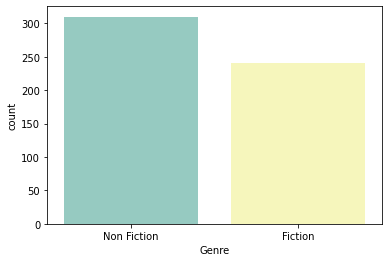

In [7]:
print("Genre:", '\n', data['Genre'].value_counts())

sns.countplot('Genre', data=data, palette='Set3')
plt.show()

## Numbers

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


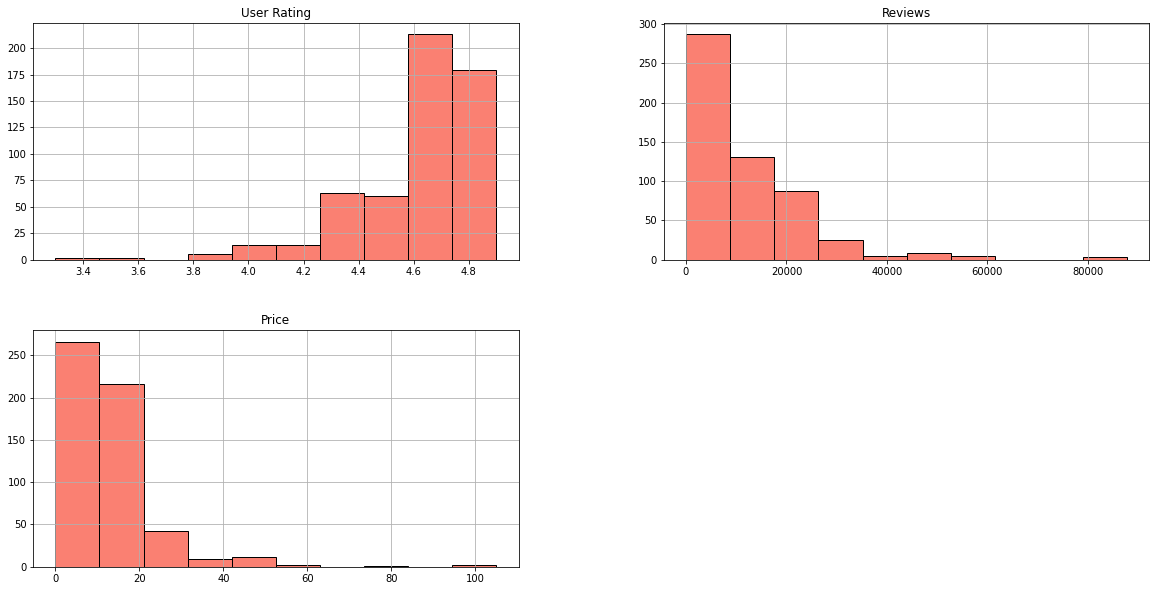

,User Rating,User Rating Count,Reviews,Reviews Count,Price,Price Count
0,"(3.298, 3.46]",1,"(-50.804, 8817.4]",287,"(-0.105, 10.5]",266
1,"(3.46, 3.62]",1,"(8817.4, 17597.8]",131,"(10.5, 21.0]",225
2,"(3.62, 3.78]",0,"(17597.8, 26378.2]",87,"(21.0, 31.5]",33
3,"(3.78, 3.94]",5,"(26378.2, 35158.6]",25,"(31.5, 42.0]",10
4,"(3.94, 4.1]",20,"(35158.6, 43939.0]",4,"(42.0, 52.5]",11
5,"(4.1, 4.26]",8,"(43939.0, 52719.4]",8,"(52.5, 63.0]",2
6,"(4.26, 4.42]",63,"(52719.4, 61499.8]",5,"(63.0, 73.5]",0
7,"(4.42, 4.58]",60,"(61499.8, 70280.2]",0,"(73.5, 84.0]",1
8,"(4.58, 4.74]",213,"(70280.2, 79060.6]",0,"(84.0, 94.5]",0
9,"(4.74, 4.9]",179,"(79060.6, 87841.0]",3,"(94.5, 105.0]",2


In [8]:
numbers = ['User Rating', 'Reviews', 'Price']

data.loc[:,numbers].hist(color='salmon', figsize=(20,10), edgecolor='black', bins=10)
plt.show()

rating_binned = pd.cut(data['User Rating'], bins=10)
rating_binned = pd.DataFrame(pd.DataFrame(rating_binned).groupby('User Rating').size(), columns=['User Rating Count']).reset_index()

Reviews_binned = pd.cut(data['Reviews'], bins=10)
Reviews_binned = pd.DataFrame(pd.DataFrame(Reviews_binned).groupby('Reviews').size(), columns=['Reviews Count']).reset_index()

Price_binned = pd.cut(data['Price'], bins=10)
Price_binned = pd.DataFrame(pd.DataFrame(Price_binned).groupby('Price').size(), columns=['Price Count']).reset_index()

display(pd.concat([rating_binned, Reviews_binned, Price_binned], axis=1))

## Dates(year)

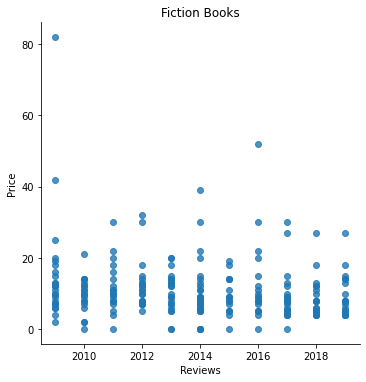

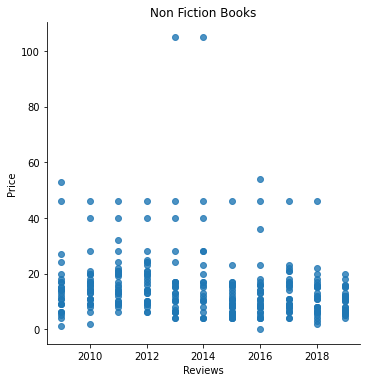

In [9]:
for genre in ['Fiction','Non Fiction']:
    temp_fiction = data[data['Genre']==genre]
    sns.lmplot(x='Year',y='Price',data=temp_fiction, fit_reg=False)
    plt.title('{} Books'.format(genre))
    plt.xlabel('Reviews')
    plt.ylabel('Price')
    plt.show()

## Data Sorting

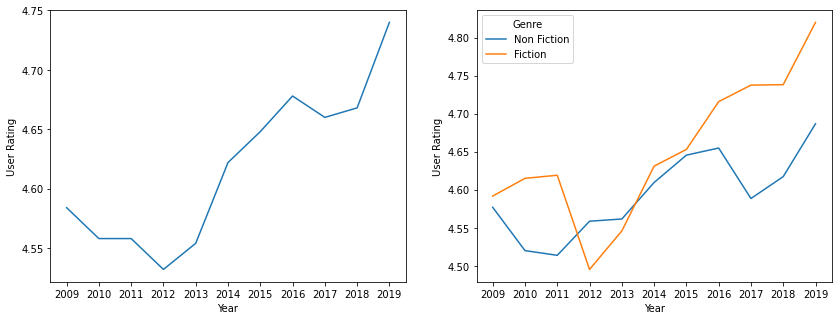

,User Rating,Rating Fiction,Rating Non Fiction
Year,,,
2009,4.584,4.592,4.577
2010,4.558,4.615,4.520
2011,4.558,4.619,4.514
2012,4.532,4.495,4.559
2013,4.554,4.546,4.562
2014,4.622,4.631,4.610
2015,4.648,4.653,4.645
2016,4.678,4.716,4.655
2017,4.660,4.737,4.588


In [10]:
fig, ax = plt.subplots(1,2, figsize=(14,5))

rating = data.groupby('Year')['User Rating'].mean()
rating = rating.reset_index()

sns.lineplot(x='Year', y='User Rating', data=data, ci=None, markers=True, ax=ax[0])
ax[0].set_xticks(ticks=data['Year'].value_counts(ascending=True).index)

sns.lineplot(x='Year', y='User Rating', hue='Genre', data=data, ci=None, markers=True, ax=ax[1])
ax[1].set_xticks(ticks=data['Year'].value_counts(ascending=True).index)

plt.show()

time = pd.DataFrame(data.groupby('Year')['User Rating'].mean())
time_genre = pd.DataFrame(data.groupby(['Genre', 'Year'])['User Rating'].mean())

time['Rating Fiction'] = list(np.around(time_genre.loc['Fiction'].reset_index()['User Rating'], 3))
time['Rating Non Fiction'] = list(np.around(time_genre.loc['Non Fiction'].reset_index()['User Rating'], 3))
display(time)







## Prices behaviour

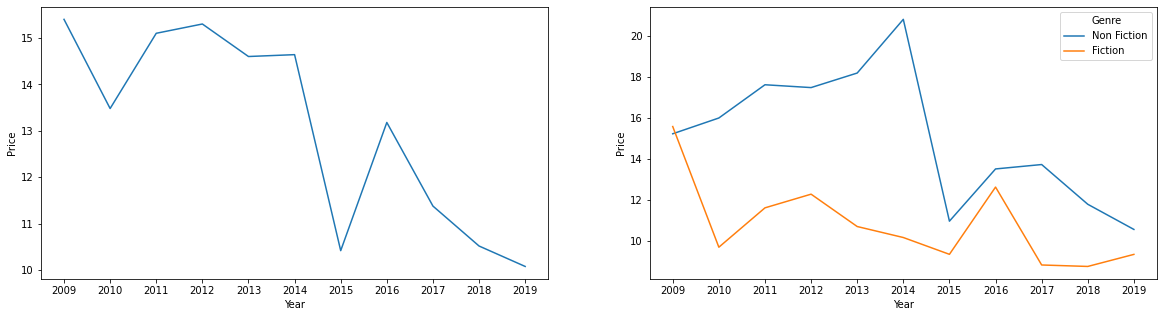

,Price,Price Fiction,Price Non Fiction
Year,,,
2009,15.40,15.583,15.231
2010,13.48,9.700,16.000
2011,15.10,11.619,17.621
2012,15.30,12.286,17.483
2013,14.60,10.708,18.192
2014,14.64,10.172,20.810
2015,10.42,9.353,10.970
2016,13.18,12.632,13.516
2017,11.38,8.833,13.731


In [11]:
fig, ax = plt.subplots(1,2, figsize=(20,5))

price = data.groupby('Year')['Price'].mean()
price = price.reset_index()

sns.lineplot(x='Year', y='Price', data=data, ci=None, markers=True, ax=ax[0])
ax[0].set_xticks(ticks=data['Year'].value_counts(ascending=True).index)

sns.lineplot(x='Year', y='Price', data=data, ci=None, markers=True, ax=ax[1], hue='Genre')
ax[1].set_xticks(ticks=data['Year'].value_counts(ascending=True).index)

plt.show()

time = pd.DataFrame(data.groupby('Year')['Price'].mean())
time_genre = pd.DataFrame(data.groupby(['Genre', 'Year'])['Price'].mean())

time['Price Fiction'] = list(np.around(time_genre.loc['Fiction'].reset_index()['Price'], 3))
time['Price Non Fiction'] = list(np.around(time_genre.loc['Non Fiction'].reset_index()['Price'], 3))
display(time)


## Prices and User Rating

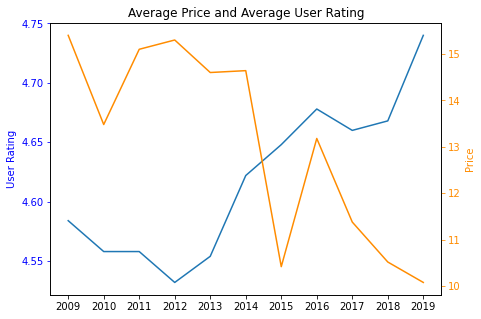

In [12]:
fig, ax = plt.subplots(figsize=(7,5))

ax.set_title('Average Price and Average User Rating')

ax.plot(data.groupby('Year')['User Rating'].mean())
ax.tick_params('y', colors='blue')
ax.set_ylabel('User Rating', color='blue')

ax2 = ax.twinx()
ax2.plot(data.groupby('Year')['Price'].mean(), color='darkorange')
ax2.tick_params('y', colors='darkorange')
ax2.set_ylabel('Price', color='darkorange')

ax.set_xticks(ticks=data['Year'].value_counts(ascending=True).index)

plt.show()

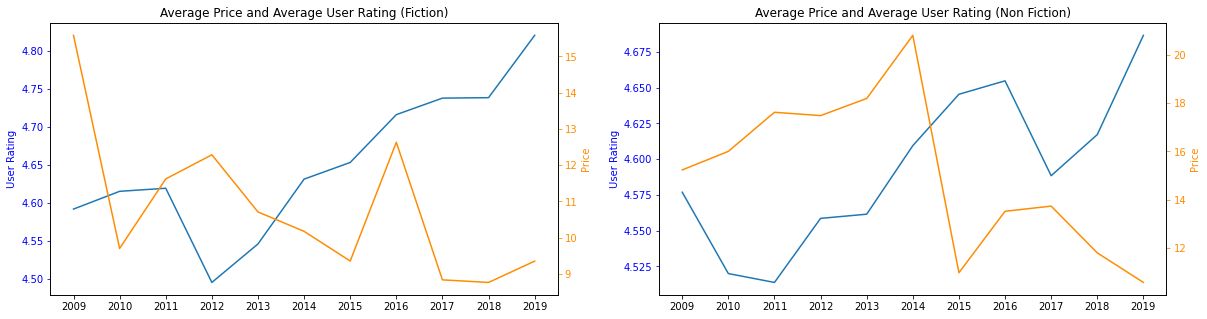

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(20,5))

fiction = data[data['Genre']=='Fiction']

Nonfiction = data[data['Genre']=='Non Fiction']


ax[0].set_title('Average Price and Average User Rating (Fiction)')

ax[0].plot(fiction.groupby('Year')['User Rating'].mean())
ax[0].tick_params('y', colors='blue')
ax[0].set_ylabel('User Rating', color='blue')

ax2 = ax[0].twinx()
ax2.plot(fiction.groupby('Year')['Price'].mean(), color='darkorange')
ax2.tick_params('y', colors='darkorange')
ax2.set_ylabel('Price', color='darkorange')

ax[0].set_xticks(ticks=data['Year'].value_counts(ascending=True).index)


ax[1].set_title('Average Price and Average User Rating (Non Fiction)')

ax[1].plot(Nonfiction.groupby('Year')['User Rating'].mean())
ax[1].tick_params('y', colors='blue')
ax[1].set_ylabel('User Rating', color='blue')

ax3 = ax[1].twinx()
ax3.plot(Nonfiction.groupby('Year')['Price'].mean(), color='darkorange')
ax3.tick_params('y', colors='darkorange')
ax3.set_ylabel('Price', color='darkorange')

ax[1].set_xticks(ticks=data['Year'].value_counts(ascending=True).index)


plt.show()

## Number of reviews and rating relationship

In [14]:
data['Reviews/Rating'] = data['Reviews']/data['User Rating']
data.sort_values('Reviews/Rating', ascending=False)

,Name,Author,User Rating,Reviews,Price,Year,Genre,Description,Reviews/Rating
382,The Girl on the Train,Paula Hawkins,4.1,79446,18,2015,Fiction,The Girl on the Train By Paula Hawkins - UK Ha...,19377.073171
383,The Girl on the Train,Paula Hawkins,4.1,79446,7,2016,Fiction,The Girl on the Train By Paula Hawkins - UK Ha...,19377.073171
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction,The wildlife scientist Delia Owens has found h...,18300.208333
135,Gone Girl,Gillian Flynn,4.0,57271,10,2012,Fiction,Gone Girl is a thriller novel in the mystery a...,14317.750000
136,Gone Girl,Gillian Flynn,4.0,57271,10,2013,Fiction,Gone Girl is a thriller novel in the mystery a...,14317.750000
...,...,...,...,...,...,...,...,...,...
359,The Daily Show with Jon Stewart Presents Earth...,Jon Stewart,4.4,440,11,2010,Non Fiction,Eight-time Emmy-winner Stewart (America: The B...,100.000000
512,True Compass: A Memoir,Edward M. Kennedy,4.5,438,15,2009,Non Fiction,The memoir deals with Kennedy's experiences wi...,97.333333
121,George Washington's Sacred Fire,Peter A. Lillback,4.5,408,20,2010,Non Fiction,Lillback convincingly shows how when faced wit...,90.666667
300,Soul Healing Miracles: Ancient and New Sacred ...,Zhi Gang Sha,4.6,220,17,2013,Non Fiction,Master Sha's Soul Healing Miracles teaches and...,47.826087


## PREDICTION/ANALYSIS USING ML TECHNIQUE

## Content Based Recommender System

In [15]:
data['Description']=data['Description'].fillna('')


def rem_stopwords_tokenize(data,name):
      
    def getting(sen):
        example_sent = sen

        stop_words = set(stopwords.words('english')) 

        word_tokens = word_tokenize(example_sent) 

        filtered_sentence = [w for w in word_tokens if not w in stop_words] 

        filtered_sentence = [] 

        for w in word_tokens: 
            if w not in stop_words: 
                filtered_sentence.append(w) 
        return filtered_sentence
    x=[]
    for i in data[name].values:
        x.append(getting(i))
    data[name]=x
    
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer 
rem_stopwords_tokenize(data,'Description')

# Making a function to lemmatize all the words
lemmatizer = WordNetLemmatizer() 
def lemmatize_all(data,name):
    arr=data[name]
    a=[]
    for i in arr:
        b=[]
        for j in i:
            x=lemmatizer.lemmatize(j,pos='a')
            x=lemmatizer.lemmatize(x)
            b.append(x)
        a.append(b)
    data[name]=a
    
lemmatize_all(data,'Description')

def set_rec_finder(na,number):
    def intersection(lst1, lst2): 
        return list(set(lst1) & set(lst2)) 
    def find_rec(name):
        x=list(data[data['Name']==name]['Description'].values)[0]
        score=[]
        for i in range(len(data)):
            score.append([len(intersection(x,data['Description'].values[i])),data['Name'].values[i]])
        return score
    recommendations=find_rec(na)
    recommendations.sort(reverse=True)
    recommendations=np.array(recommendations)
    ans=recommendations[:number,1]
    for i in ans:
        print(i)
        

In [16]:
set_rec_finder('The Meltdown (Diary of a Wimpy Kid Book 13)',10)

The Meltdown (Diary of a Wimpy Kid Book 13)
Diary of a Wimpy Kid: Hard Luck, Book 8
The Ugly Truth (Diary of a Wimpy Kid, Book 5)
The Third Wheel (Diary of a Wimpy Kid, Book 7)
Harry Potter and the Prisoner of Azkaban: The Illustrated Edition (Harry Potter, Book 3)
Wrecking Ball (Diary of a Wimpy Kid Book 14)
The Hate U Give
The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change
Dog Days (Diary of a Wimpy Kid, Book 4) (Volume 4)
Diary of a Wimpy Kid: The Last Straw (Book 3)
